
#GRIP : GRADUATE INTERNSHIP ROTATIONAL PROGRAM
#THE SPARKS FOUNDATION
#DATA SCIENCE AND BUSINESS ANALYTICS INTERN
# **AUTHOR: ISHA RANKA**
Task 3-Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
data=pd.read_csv("/gdrive/MyDrive/SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **check for null values**

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


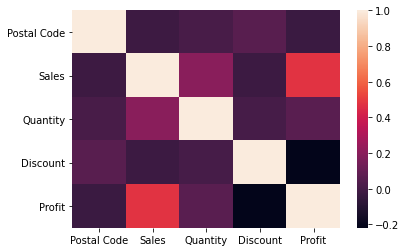

In [9]:
#check for correlation between columns
corr=data.corr()
sns.heatmap(corr)

In [10]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

#Four categories under ship mode

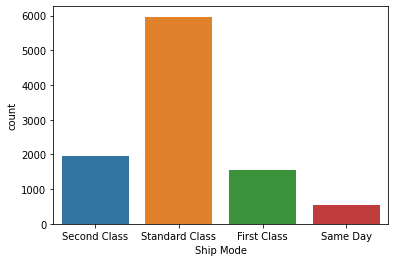

In [11]:
sns.countplot(x='Ship Mode',data=data) # standard clas has highest count

# shipmode against profit

In [12]:
fig = px.bar(data, x='Ship Mode', y='Profit')
fig.show()

**Standard class shiping making highest profits**

In [13]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

#only one value for country so we can drop this column(does help in prediction of profit)


In [15]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

#pychart plotly to see percentage of each segement

In [17]:
freq=data['Segment'].index
fig = px.pie(data, values=freq, names='Segment')
fig.show()

#which category make highest sales segment wise

Text(0.5, 1.0, 'Home Office')

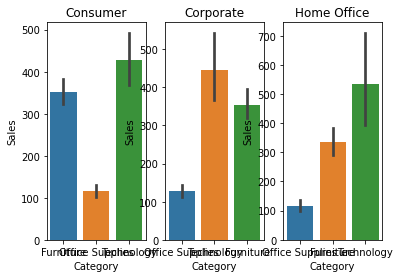

In [18]:
plt.subplot(1,3,1)
plt.title('Consumer')  
s=data[data['Segment']=='Consumer']
sns.barplot(data=s,x='Category',y='Sales')
plt.subplot(1,3,2)
s=data[data['Segment']=='Corporate']
sns.barplot(data=s,x='Category',y='Sales')
plt.title('Corporate')
plt.subplot(1,3,3)
s=data[data['Segment']=='Home Office']
sns.barplot(data=s,x='Category',y='Sales')
plt.title('Home Office')



# see which segment makes good profits

In [19]:
fig = px.bar(data, x='Segment', y='Profit')
fig.show()

In [20]:
fig = px.bar(data, x='Segment', y='Profit',color="Sub-Category")
fig.show()

#*lets see number of unique states,cities and postal codes*

In [21]:
# counting unique values of State column
n = len(pd.unique(data['State']))
n #49 unique states (highest no. is of california)
data['State'].value_counts()


California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [22]:
fig = px.bar(data, x='State', y='Sales')
fig.show()

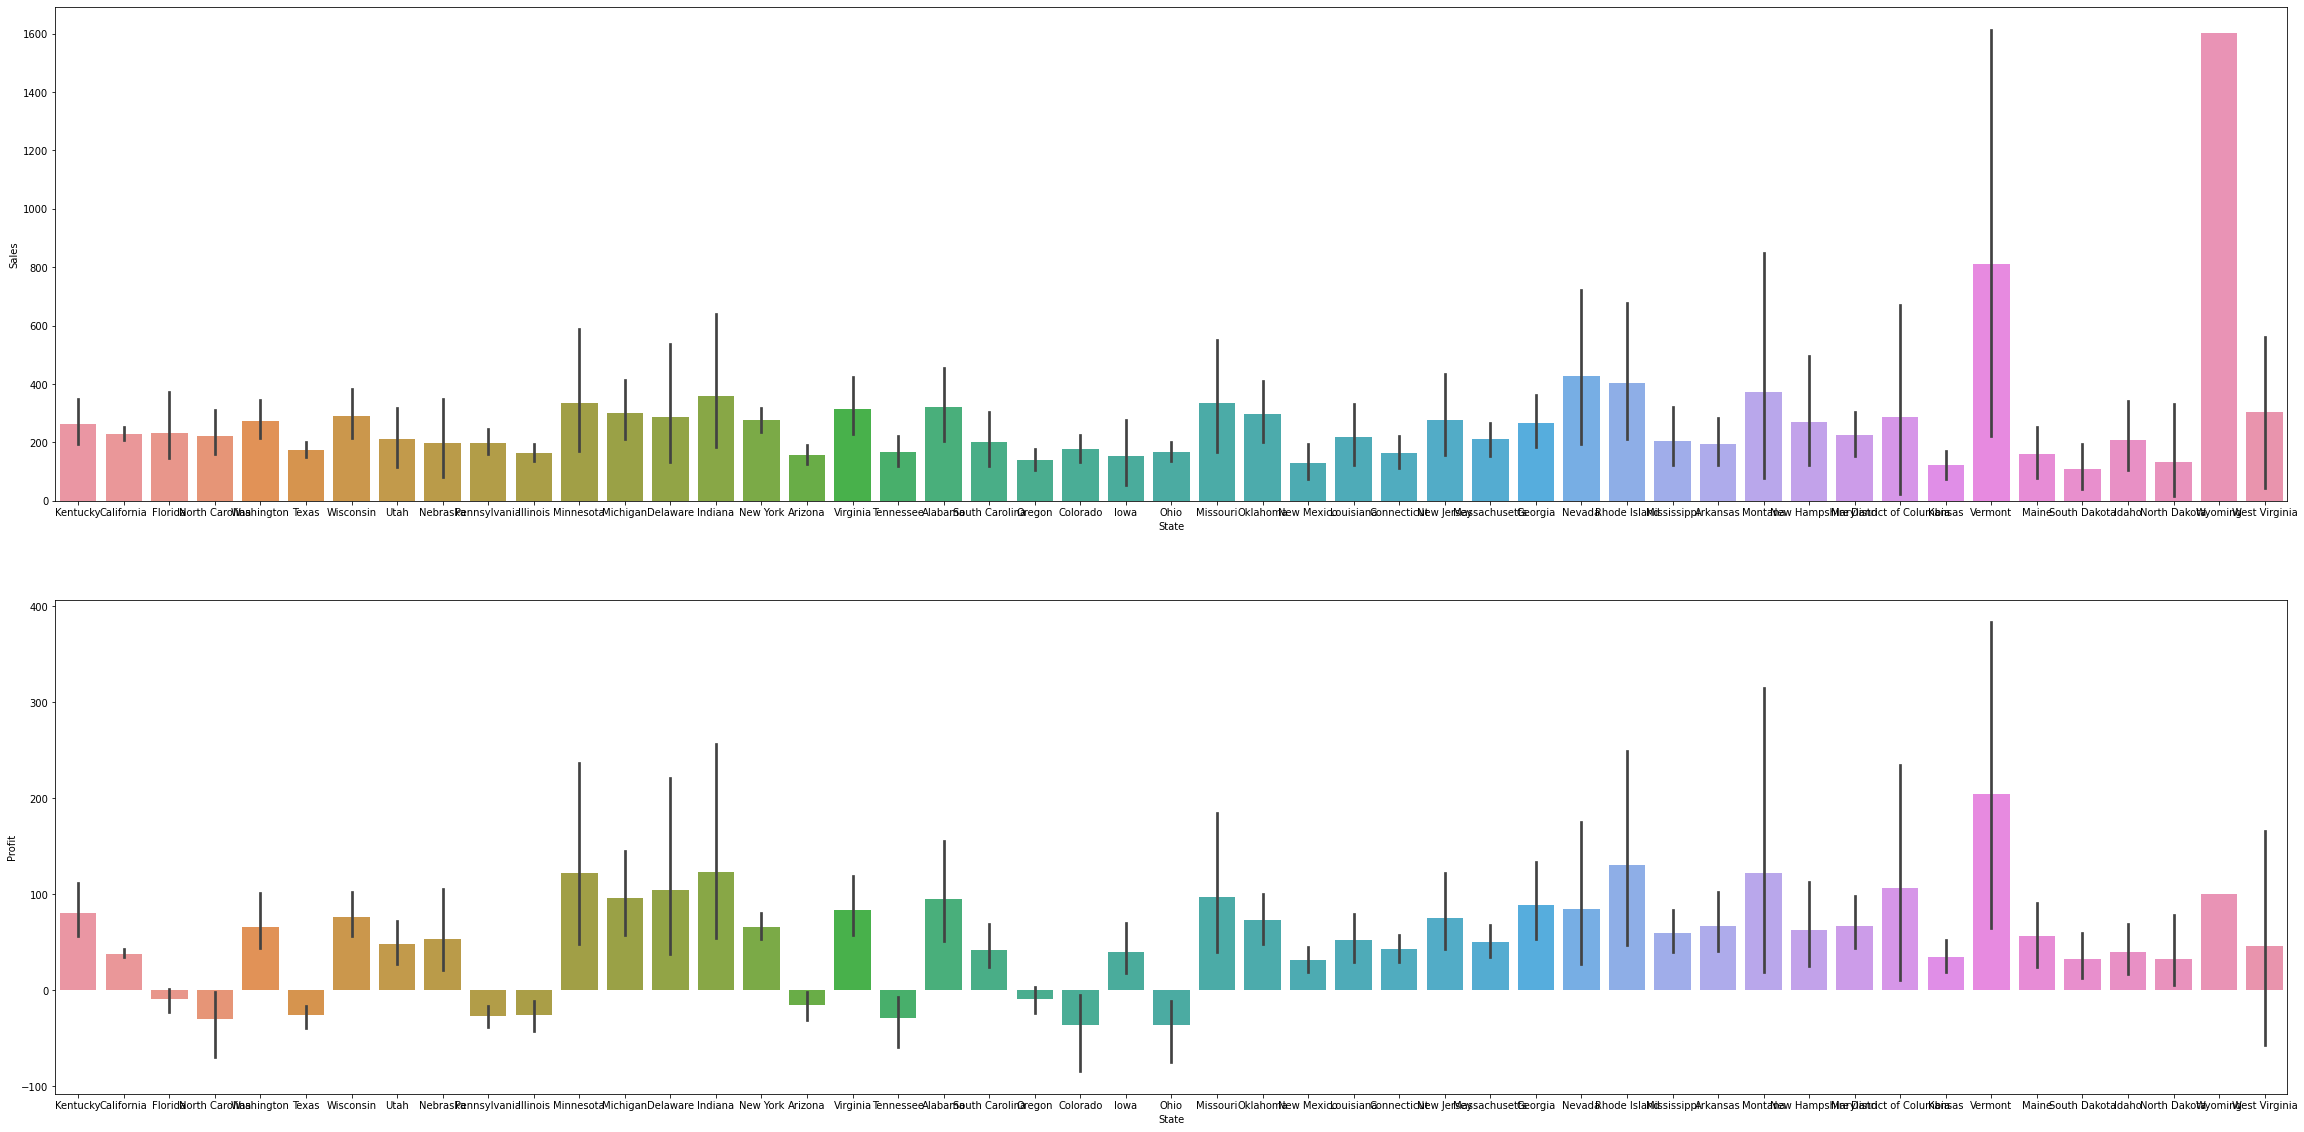

In [23]:


fig = plt.figure(figsize=(40, 20))

# Adds subplot on position 1
ax = fig.add_subplot(211)
sns.barplot(data=data,x='State',y='Sales')
# Adds subplot on position 2
ax2 = fig.add_subplot(212)
sns.barplot(data=data,x='State',y='Profit')


In [24]:
Abbreviations = {'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE',
            'District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
             'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
             'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND',
             'Northern Mariana Islands':'MPI','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI', 'South Carolina': 'SC',
             'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV',
             'Wisconsin': 'WI','Wyoming': 'WY'}
data['code']=data.State.map(Abbreviations)
store=data[['Profit','code']].groupby(['code']).sum()


In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth( locations=store.index, z=store.Profit,locationmode='USA-states',
                                    colorscale="Viridis",colorbar_title='Profit'
                                     ))
fig.update_layout(mapbox_style="carto-positron",geo_scope='usa',height=600)
fig.show()

In [26]:
# counting unique values of city column
n = len(pd.unique(data['City']))
n

531

In [27]:
# counting unique values of city column
n = len(pd.unique(data['Postal Code']))
data['Postal Code']//1000

0       42
1       42
2       90
3       33
4       33
        ..
9989    33
9990    92
9991    92
9992    92
9993    92
Name: Postal Code, Length: 9994, dtype: int64

In [28]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,code
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028,FL
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,CA
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,CA
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,CA
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480,CA


In [29]:
freq=data['Region'].index
fig = px.pie(data, values=freq, names='Region')
fig.show()

#region wise sales

In [30]:
fig = px.bar(data, x='Region', y='Sales')
fig.show()

#region wise profit 

In [31]:
fig = px.bar(data, x='Region', y='Profit')
fig.show()

#State-region wise profit 

In [32]:
fig = px.bar(data, x='Region', y='Profit',color='State')
fig.show()

In [33]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


In [34]:
data['Category'].value_counts() #3 unique values

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

#histogram visualization of category

In [35]:
fig = px.histogram(data, x="Category")
fig.show()

In [36]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# visualizing sub-category inside categories

In [37]:
fig = px.histogram(data, x="Category", color="Sub-Category", marginal="rug" # can be `box`, `violin`
                  )
fig.show()

#subcategory under different categories performance on the basis of profit

In [38]:
fig = px.bar(data, x='Category', y='Profit',color="Sub-Category")
fig.show()

#lets look at sales

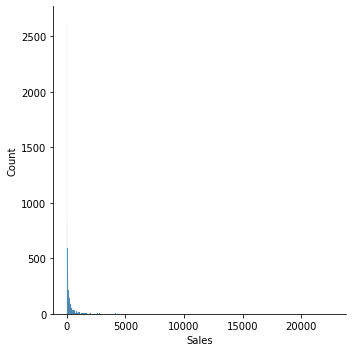

In [39]:
sns.displot(data['Sales'])

In [40]:
max(data['Sales'])

22638.48

In [41]:
min(data['Sales'])

0.444

In [42]:
x=data[data['Sales']<5000]
x.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



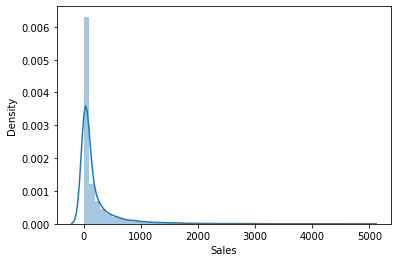

In [43]:
sns.distplot(x['Sales']) #ZOOMED #mostly concentrated between 0 to 1000

#Detection of outliers

In [44]:
fig = px.box(data, y="Sales")
fig.show()# for detecting outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



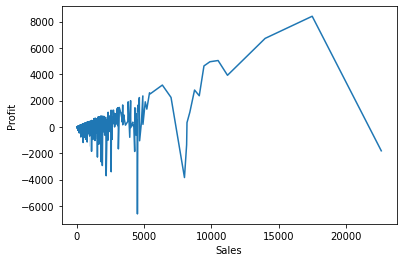

In [45]:
sns.lineplot('Sales','Profit',data=data)

#visualizing quantity trend 

In [46]:
import plotly.figure_factory as ff
hist_data = [data['Quantity']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [47]:
data['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [48]:
fig = px.histogram(data, x="Discount")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



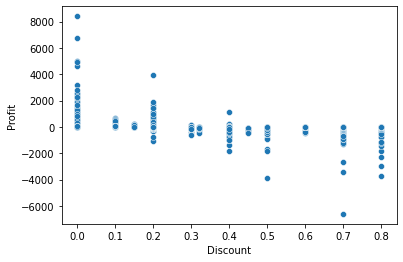

In [49]:
sns.scatterplot('Discount','Profit',data=data)

#Some solutions to increase profits:
#The weak areas where we can
#work to make more profit is the furniture category as it is making maximum negative profits.
#the city of texas and illinois suffering from negative profits can be improved by increasing supply of categories making highest profits

# THE FIRST PRIORITY OF POPULATION IS OFFICE SUPPLIES AND TECHNOLOGIES MATERIAL DUE TO GROWING JOB SECTOR AND UGRADATION IN TECHNOLOGY.
#FURNITURE PROFITS CAN INCREASE IN THE REGIONS OF NEW SETTLEMENT. Thus should be supplied in good amount to those region and lesser to other regions to improve profits